# Solving the Schrödinger Equation

## Different Potention Functions *V*

"Particle in a Box" Potential Functions:
- Infinite Potential Well
- 1D Egg Carton (Cosine Potential)
- Finite Potential Well
- Semi-Infinite Potential Well
- Slanted Potential Well
- V-Shaped (Heaviside-Lambda) Potential Well
- Single/Multiple Internal Barriers
- Spherical Potential Well

Harmonic Oscillator Functions:
- Simple Harmonic Oscillator
- Quartic Oscillator
- Morse Oscillator
- Lennard-Jones Potential
- Double Morse Potential
- 2D Harmonic Oscillator
- 3D Harmonic Oscillator
- Hydrogen Atom Radial Equation
- Modified Harmonic Potential

In [4]:
import numpy as np

def infinite_potential_well(x, L, N, dx = 0):
        """
        Returns the potential function for a particle in an infinite potential well of length L.
        """
        if type(x) not in [int, float]:
                dx = x[1] - x[0]
                xp = np.linspace(dx, L-dx, N-1)
                U = np.linspace(dx, L-dx, N-1)
                for i in range(len(U)):
                        U[i] = 0
                        if xp[i] > L/4 and xp[i] < 3*L/4:
                                U[i] = 0
                        else:
                                U[i] = 500
        else: # This branch is for the shooting method
                U = 0
                if x > L/4 and x < 3*L/4:
                        U = 0
                else:
                        U = 500
        return U

def V_shaped__potential_well(x, L, N, slope = 400, dx = 0):
        """Returns the potential function for a particle in a V-shaped infinite potential well centre at x=L/2.

        Args:
                x (int or numpy.ndarray): The position of the particle.
                L (int): the length of the well
        """
        if type(x) != int:
                dx = x[1] - x[0]
        xp = np.linspace(dx, L-dx, N-1)
        U0 = 100
        U = np.linspace(dx, L-dx, N-1)
        for i in range(len(U)):
                U[i] = slope*abs(xp[i] - L/2)
        return U

def complex_step_function_potential(x, L, N, dx = 0):
        """
        Potential function for the particle.
        """
        if type(x) != int:
                dx = x[1] - x[0]
        xp = np.linspace(dx, L-dx, N-1)
        U0 = 150
        U = np.linspace(dx, L-dx, N-1)
        for i in range(len(U)):
                U[i] = 0
                if xp[i] > L/4 and xp[i] < 3*L/4:
                        U[i] = U0
                elif (xp[i] >= 3*L/4 and xp[i] <= 5*L/8) or (xp[i] <= L/4 and xp[i] >= L/8):
                        U[i] = 0
                else:
                        U[i] = 90
        return U

def simple_step_function_potential(x, L, N, dx = 0):
        U0 = 100
        if type(x) not in [int, float]:
                dx = x[1] - x[0]
                xp = np.linspace(dx, L-dx, N-1)
                U = np.linspace(dx, L-dx, N-1)
                for i in range(len(U)):
                        U[i] = 0
                        if xp[i] > L/2:
                                U[i] = U0
        else: # This branch is for the shooting method
                U0 = 5
                U = 0
                if x > L/2:
                        U = U0
        return U

def zero_potential(x, L, N, dx = 0):
        """
        Returns the potential function for a particle in a flat zero potential of length L.
        """
        if type(x) not in [int, float]:
                dx = x[1] - x[0]
                U = np.linspace(dx, L-dx, N-1)
                for i in range(len(U)):
                        U[i] = 0
        else: # This branch is for the shooting method
                U = 0
        return U

## Different Numerical Methods

- Finite Difference Method
- Finite Element Method
- Numerov Method
- Split-Step Fourier Method

### Finite Difference Method

The Schrodinger Equation takes the form
$$ -\frac{\hbar^2}{2m}\frac{\partial^2\psi}{\partial x^2} + U\psi = E\psi$$

where $U$ is the potential energy, $E$ is the kinetic energy, $\hbar$ is the reduced Plack constant, $m$ is mass, and $\psi$ is the wavefunction. Because this is a second order PDE, it cannot be integrated directly, so must be somehow simplified.

Say we are integrating over some range $a$ to $b$. In the Finite Difference method, the integral is split up into some discrete grid of $N$ points ranging over $a$ to $b$. At each grid point, the wavefunction $\psi$ at that point is denoted by $\psi_i$, where $i \in (0, N)$. The first derivative of the wavefunction with respect to position $x$ $\psi'$ can be written as:
$$\psi' = \frac{\Delta \psi}{\Delta x} = \frac{\psi_{i+1} - \psi_{i-1}}{2\Delta x}$$
where $\Delta x$ is the grid spacing. From this, we can find that the second derivative with respect to position $x$ can be written as:
$$\psi'' = \frac{\frac{\psi_{i+1} - \psi_{i}}{\Delta x} - \frac{\psi_{i} - \psi_{i-1}}{\Delta x}}{\Delta x} = \frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{\Delta x^2}$$

From that, we can now rewrite the Schrodinger equation as:
$$ -\frac{\hbar^2}{2m}\left(\frac{\psi_{i+1} - 2\psi_i + \psi_{i-1}}{\Delta x^2}\right) + U_i\psi_i = E\psi_i$$

We can see now that this is a set of linear equations (that doesn't include the boundaries $\psi_0$ or $\psi_N$). We can then write this as a set of matrix equations:
$$\vec{H}\cdot\vec{\Psi} = \vec{E}\cdot\vec{\Psi}$$
where $\vec{H}$ is the Hamiltonian matrix:
$$
H = \begin{bmatrix}
\left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & 0 & \cdots & 0 \\
\left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \ddots & \vdots \\
0 & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) \\
0 & \cdots & 0 & \left(\frac{-\hbar^2}{2m\Delta x^2}\right) & \left(\frac{\hbar^2}{m\Delta x^2} + U_i\right) \\
\end{bmatrix}
$$
$\vec{\Psi}$ is the set of wavefunctions:
$$
\vec{\Psi} = \begin{bmatrix}
\psi_1 \\
\psi_2 \\
\vdots \\
\vdots \\
\psi_{N-1} \\
\end{bmatrix}
$$
and $\vec{E}$ is the set of eigenvectors corresponding to the Hamiltonian. We can see now that the equation has been reduced to the eigenvalue problem. Now, all that has to be done is to solve for the matrix $\vec{E}$ to retrieve the eigenmodes of the Schrodinger for some potential function $U(x)$.

In [2]:
## Finite Difference
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def finite_difference(potential_func, N, num_plots = 4, plot = True):
        '''
        Solves the Schrodinger equation using the finite difference method
        and plots the results.
        Inputs:
        - potential_func: The potential function for the particle.
        - N: The number of points in the grid.
        - num_plots: The number of energy levels to plot.
        - plot: Whether or not to plot the results.

        Outputs:
        None

        '''
        def create_hamiltonian_matrix(N, m, hbar, Vpot, dx):
                """
                Helper Function
                Create the Hamiltonian matrix for the given potential.
                """
                diag_el = hbar**2/(m*dx**2)*np.ones(N-1) + Vpot
                off_diagonal_elements = -hbar**2/(2*m*dx**2)*np.ones(N - 2)
                Hmat = np.diag(diag_el) + np.diag(off_diagonal_elements, 1) + np.diag(off_diagonal_elements, -1)

                return Hmat
        
        
        hbar = 1 # Planck's constant set to 1 for simplicity
        m = 1 # Mass of the particle set to 1 for simplicity
        a = 1 # Length of the well

        x = np.linspace(0, a, N+1) # Grid points
        dx = x[1] - x[0] # Step size
        xp = np.linspace(dx, a-dx, N-1) # Grid points for plotting

        U = potential_func(x, a, N) # Potential function
        E, psi = eigh(create_hamiltonian_matrix(N, m, hbar, U, dx)) # Solve the Schrodinger equation

        # Fetch the name of the potential function for plotting reasons
        plot_title = potential_func.__name__.split('_')
        for i in range(len(plot_title)):
                plot_title[i] = plot_title[i].title()
        plot_title = ' '.join(plot_title)

        if plot:
                # Get a color map
                cmap = plt.get_cmap('cool')
                colors = [cmap(i) for i in np.linspace(0, 1, num_plots)]

                plt.figure(1)
                plt.title(f"Finite Difference Method, {plot_title}")
                plt.plot(x[1:-1], U, 'k-')

                for i in range(num_plots): 
                        I = np.sum(psi.T[i]**2 * dx)
                        A = np.sqrt(1/I)
                        plt.plot(xp, (2*A*psi.T[i])**2 + E[i], color = colors[i])
                plt.grid()
                plt.xlabel('x')
                plt.ylabel('$\psi(x)$')
                plt.show()

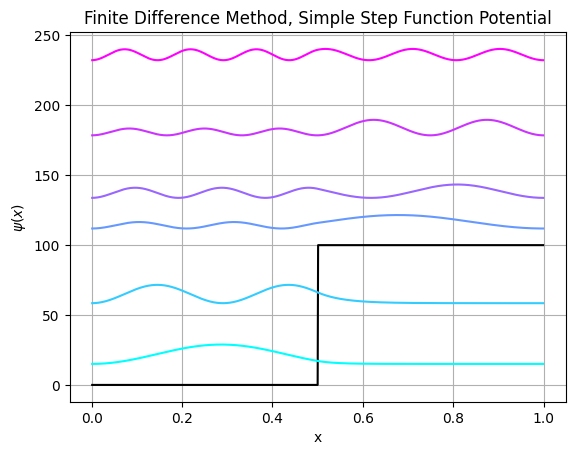

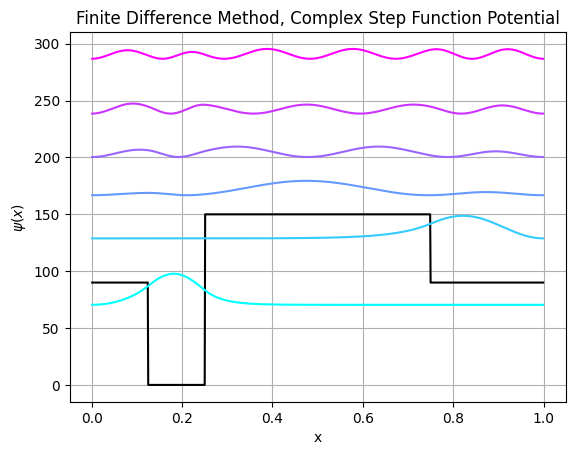

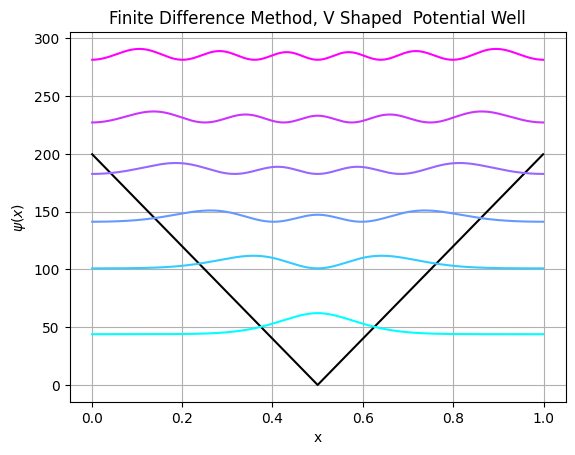

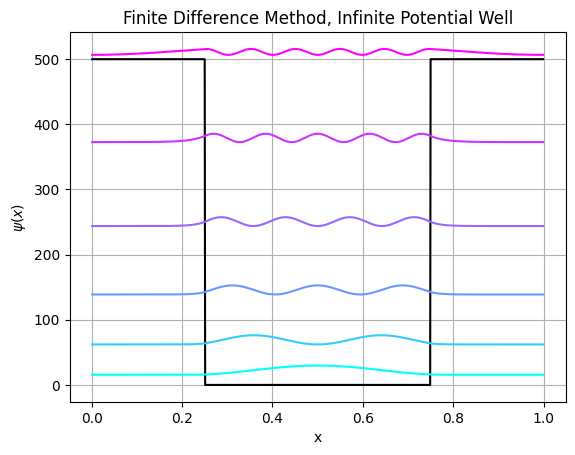

In [3]:
finite_difference(simple_step_function_potential, 1000, 6)
finite_difference(complex_step_function_potential, 1000, 6)
finite_difference(V_shaped__potential_well, 1000, 6)
finite_difference(infinite_potential_well, 1000, 6)

### Shooting Method

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def shooting_method(potential_func, num_plots = 4, plot = True):
    # CONSTANTS
    L = 1 # Length of the well
    mass = 577000 # Mass of the particle
    hbc = 197 # Planck's constant
    k = 2*mass/hbc**2 # Constant

    x = 0 # Initial position

    dE = 0.001 # Energy step
    dx = 0.001 # Position step

    def shooter_helper(potential_func, inner_E, norm = 1):
        """
        Helper function
        Solves the Schrodinger equation using the shooting method.
        """
        nonlocal dx, k, L, x, dE
        print(f"Running Helper Function for Energy Guess {inner_E:.3f}")

        U = potential_func(x, L, 1000, dx = dx) # Potential function
        psi = 0 # Initial value of psi
        dpsi = 1/np.sqrt(norm) # Initial value of psi derivative
        ddpsi = -k*psi*(inner_E - U) # Initial value of psi double derivative

        psi_f = 1 # Final value of psi

        while np.abs(psi_f) > 0.002:
            # Resetting the variables
            x = 0
            psi = 0
            dpsi = 1/np.sqrt(norm)
            ddpsi = -k*psi*(inner_E - U) # Initial value of psi double derivative

            inner_psi_array = []
            inner_xp_array = []

            while x < L:
                U = potential_func(x, L, 1000, dx = dx) # Potential function
                
                ddpsi = -k*psi*(inner_E - U)

                if ddpsi > 1000 or (inner_E > 1000 or inner_E < 0):
                        # If ddpsi is getting this big, something is wrong.
                        print(f"ddpsi ({ddpsi}) or inner E ({inner_E}) is getting too big. Exiting...")
                        break

                dpsi += ddpsi*dx
                psi += dpsi*dx
                x += dx

                inner_psi_array.append(psi)
                inner_xp_array.append(x)

            psi_f = psi
            inner_E += dE

        return inner_xp_array, inner_psi_array, inner_E
    
    def normal_helper(psi_p):
        print("Normalising the wavefunction...")
        # Normalise the wavefunction
        area = 0
        for i in range(len(psi_p)):
            area += psi_p[i]**2*dx
        print(f"Area under the curve: {area}")
        return area
    
    # Initialise the Arrays
    xp_hist = []
    psi_p_hist = []

    E_guess = 0 # Initial Energy guess of the particle
    E = [] # array of energies
    
    while len(xp_hist) <= num_plots:
        print(f"Energy level {len(xp_hist)+1}")
        outer_xp, outer_psi_p, temp_e = shooter_helper(potential_func, E_guess)
        norm_temp = normal_helper(outer_psi_p) # Temporary normalisation value

        if norm_temp < 1.1 and norm_temp > 0.99: # If function is normalised
            # Keep the values
            xp_hist += [outer_xp]
            psi_p_hist += [outer_psi_p]
            E.append(temp_e)

        else: # Function is not normalised
            # Re-run the function with the normalisation value
            outer_xp, outer_psi_p, temp_e = shooter_helper(potential_func, E_guess, norm = norm_temp)
            xp_hist += [outer_xp]
            psi_p_hist += [outer_psi_p]
            E.append(temp_e)
        
        E_guess += E[-1] + 0.1 # Increment the energy guess for the next state
        
    # Plotting
    if plot:

        # Fetch the name of the potential function for plotting reasons
        plot_title = potential_func.__name__.split('_')
        for i in range(len(plot_title)):
                plot_title[i] = plot_title[i].title()
        plot_title = ' '.join(plot_title)


        # Get a color map
        cmap = plt.get_cmap('cool')
        colors = [cmap(i) for i in np.linspace(0, 1, num_plots)]

        plt.figure(1)
        plt.title(f"Finite Difference Method, {plot_title}")

        # Plot the potential function
        plot_x = np.linspace(0, 1, 1000)
        plt.plot(plot_x[:-1], potential_func(plot_x, L, 1000), 'k-')

        # Plot the wavefunctions
        for i in range(len(xp_hist)-1): 
            cur_psi = np.array(psi_p_hist[i])
            I = np.sum(cur_psi**2 * dx)
            A = np.sqrt(1/I) # Amplitude
            plt.plot(xp_hist[i], (A*cur_psi)**2 + E[i]**2, color = colors[i])
            
        plt.grid()
        plt.xlabel('x')
        plt.ylabel('$\psi(x)$')
        plt.show() 


Energy level 1
Running Helper Function for Energy Guess 0.000
Normalising the wavefunction...
Area under the curve: 0.05087082030878074
Running Helper Function for Energy Guess 0.000
Energy level 2
Running Helper Function for Energy Guess 0.433
Normalising the wavefunction...
Area under the curve: 0.012732204692591249
Running Helper Function for Energy Guess 0.433
Energy level 3
Running Helper Function for Energy Guess 1.862
Normalising the wavefunction...
Area under the curve: 0.005660954376907777
Running Helper Function for Energy Guess 1.862
Energy level 4
Running Helper Function for Energy Guess 4.950
Normalising the wavefunction...
Area under the curve: 0.003184934008320419
Running Helper Function for Energy Guess 4.950
Energy level 5
Running Helper Function for Energy Guess 10.361
Normalising the wavefunction...
Area under the curve: 0.001415851239042968
Running Helper Function for Energy Guess 10.361


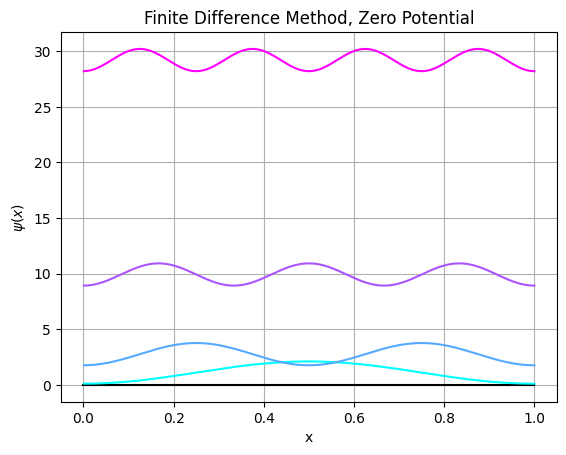

In [14]:
shooting_method(zero_potential, num_plots = 4)

### Eigenstate Evolution

https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid17.ipynb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
import numba
from numba import jit
from scipy.linalg import eigh_tridiagonal

Nx = 301
dx = 1/(Nx-1)
x = np.linspace(0, 1, Nx)
psi0 = np.sqrt(2)*np.sin(np.pi*x)

def V(x):
    mu, sigma = 1/2, 1/20
    return -1e4*np.exp(-(x-1/2)**2/(2*(1/20)**2))

d = 1/dx**2 + V(x)[1:-1]
e = -1/(2*dx**2) * np.ones(len(d)-1)
w, v = eigh_tridiagonal(d, e)

E_js = w[0:70]
psi_js = np.pad(v.T[0:70], [(0, 0), (1, 1)], mode='constant')
cs = np.dot(psi_js, psi0)
def psi_m2(t):
    return psi_js.T@(cs*np.exp(-1j*E_js*t))

plt.figure(figsize=(8,3))
plt.plot(x, psi0**2)
plt.plot(x, np.absolute(psi_m2(10000*dt))**2)

### Numerov Method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
h_bar = 1.055e-34  # Reduced Planck constant in J*s
m = 9.109e-31      # Mass of the particle in kg
L = 1e-10          # Length of the box in meters
N = 1000           # Number of grid points
dx = L / N         # Discretization step
E = np.array([10 * 1.6e-19])  # Initial guess for energy (in Joules)

# Define the potential function (infinite potential well)
def V(x):
    res = np.zeros_like(x)
    for i in range(len(x)):
        el = x[i]
        if 0 < el < L:
            res[i] = 0
        else:
            res[i] = np.inf
    return res
    


# Numerov algorithm to solve the Schrödinger equation
def solve_schrodinger(E):
    psi = np.zeros(N)
    psi[0] = 0
    psi[1] = dx

    k = 2 * m * dx**2 * (E - V(np.array(np.arange(N) * dx))) / h_bar**2

    for i in range(2, N):
        psi[i] = (2 * psi[i-1] * (1 - 5/12 * k[i-1]) - psi[i-2] * (1 + 1/12 * k[i-2])) / (1 + 1/12 * k[i])

    return psi

# Energy eigenvalue estimation loop
for _ in range(10):
    psi = solve_schrodinger(E[0])
    # Normalize the wavefunction
    psi /= np.sqrt(np.trapz(psi**2, dx=dx))
    
    # Update the energy guess using bisection method
    integral_psi = np.trapz(psi**2, dx=dx)
    if abs(integral_psi - 1) < 1e-5:
        break
    elif integral_psi < 1:
        E += 0.1 * 1.6e-19
    else:
        E -= 0.1 * 1.6e-19

# Plot the resulting wavefunction
x = np.linspace(0, L, N)
plt.plot(x, psi)
plt.title("Numerical Solution of Schrödinger Equation")
plt.xlabel("Position")
plt.ylabel("Wavefunction Amplitude")
plt.show()
